In [2]:
import pandas as pd                 # Imports the pandas library, commonly used for data manipulation and analysis
import matplotlib.pyplot as plt     # Imports the matplotlib library for creating visualizations
import numpy as np                  # Imports the NumPy library for numerical computations
import math                         # Imports the math library for mathematical functions
#import keras # No need to import keras separately when using tensorflow.keras
import tensorflow as tf             # Imports the TensorFlow library, a powerful framework for machine learning and deep learning
import statsmodels.tsa as sm        # Imports the time series analysis module from the statsmodels library
from statsmodels.tsa.seasonal import seasonal_decompose                   # Imports the seasonal_decompose function for decomposing time series data into trend, seasonal, and residual components
#from statsmodels.tsa.statespace.sarimax import SARIMAX
#from statsmodels.tsa.arima_model import ARIMAResults, ARIMA
from statsmodels.graphics import tsaplots                                 # Imports functions for time series visualization from statsmodels
from statsmodels.graphics.gofplots import qqplot                          # Imports the train_test_split function from scikit-learn for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split                      # Imports the train_test_split function from scikit-learn for splitting data into training and testing sets.
from sklearn.metrics import mean_squared_error, mean_squared_log_error    # Imports the mean_squared_error and mean_squared_log_error functions for evaluating model performance
from sklearn.preprocessing import MinMaxScaler                            # Imports the MinMaxScaler class from scikit-learn for data normalization
from scipy import stats                                                   # Imports statistical functions from the SciPy library
import seaborn as sns                                                     # Imports the seaborn library for creating informative and visually appealing data visualizations
from tensorflow.keras.models import Sequential, Model, load_model         # Imports classes for building deep learning models (Sequential, Model, and load_model).
from tensorflow.keras.layers import Dense, LSTM, Activation, Bidirectional, Flatten, TimeDistributed, SimpleRNN, Dropout, GRU, Input, Add, Multiply, Conv1D, MaxPooling1D # Import Conv1D and MaxPooling1D directly from tensorflow.keras.layers
from tensorflow.keras.layers import BatchNormalization                    # Imports the BatchNormalization layer for regularization.
from tensorflow.keras import optimizers, initializers                     # Imports optimizers and initializers for training neural networks.
from tensorflow.keras.regularizers import l2                              # Imports the L2 regularization method for preventing overfitting.
from tensorflow.keras.initializers import TruncatedNormal, Constant, RandomNormal           # Imports specific initialization methods for neural network weights.
from tensorflow.keras.layers import LeakyReLU, ELU                        # Import LeakyReLU and ELU directly from tensorflow.keras.layers
import pickle                                                             # Imports the pickle library for saving and loading Python objects

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
np.random.seed(2019)            # for initializing models with same weights every time.
                                # This line sets a seed for the NumPy random number generator (np.random). A seed acts like a starting point for the sequence of random numbers that NumPy generates.
tf.random.set_seed(2019)        # This line sets a seed for TensorFlow's random number generator
validation_split = 0.25         # for train-test split of dataset.

In [ ]:
#metrics:
#root mean squared error:
def RMSE(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

#mean absolute percentage error
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
    return mape

#symmetric mean absolute error
def SMAPE(y_true, y_pred):
    smape = 100/len(y_true) * np.sum(2 * np.abs(np.array(y_pred) - np.array(y_true)) / (np.abs(np.array(y_true)) + np.abs(np.array(y_pred))))
    return smape

#mean squared logarithmic error:
def MSLE(y_true, y_pred):
    rmse = mean_squared_log_error(y_true, y_pred)
    return rmse

         HourUTC    HourDK PriceArea  SpotPriceDKK  SpotPriceEUR
0     12/31/2022  1/1/2023        DE    -38.450001     -5.170000
1       1/1/2023  1/1/2023        DE     -7.960000     -1.070000
2       1/1/2023  1/1/2023        DE    -10.930000     -1.470000
3       1/1/2023  1/1/2023        DE    -37.779999     -5.080000
4       1/1/2023  1/1/2023        DE    -33.389999     -4.490000
...          ...       ...       ...           ...           ...
8923    1/7/2024  1/7/2024        DE    772.349976    103.550003
8924    1/7/2024  1/7/2024        DE    749.599976    100.500000
8925    1/7/2024  1/7/2024        DE    695.979980     93.309998
8926    1/7/2024  1/7/2024        DE    680.010010     91.169998
8927    1/7/2024  1/7/2024        DE    625.489990     83.860001

[8928 rows x 5 columns]
ADF test results: (-9.065280337115666, 4.449938554424026e-15, 37, 8890, {'1%': -3.431085791810354, '5%': -2.8618651717403933, '10%': -2.566943083911474}, -53875.850554521014)
High p-value of ADF 

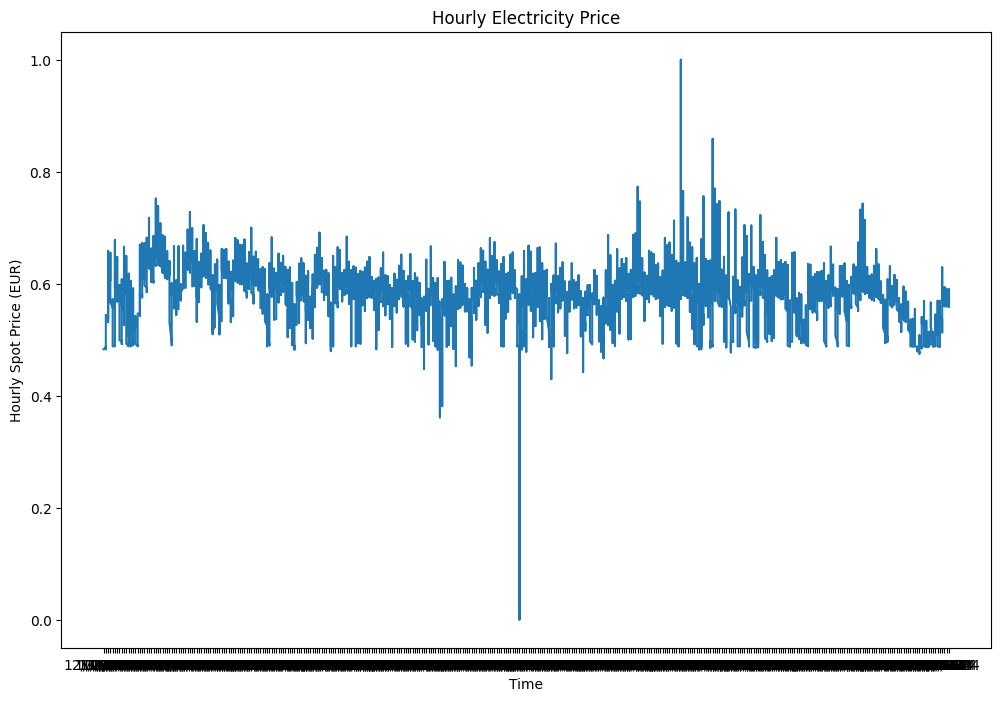

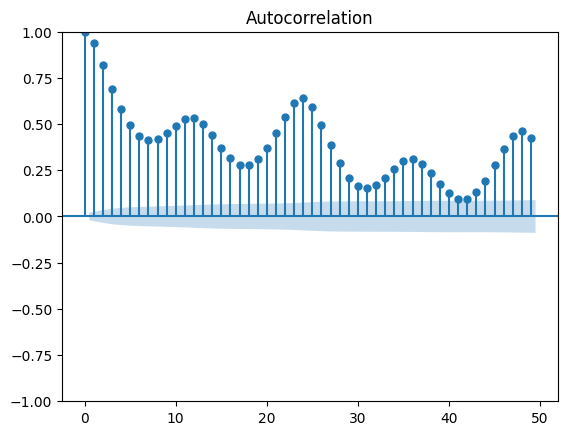

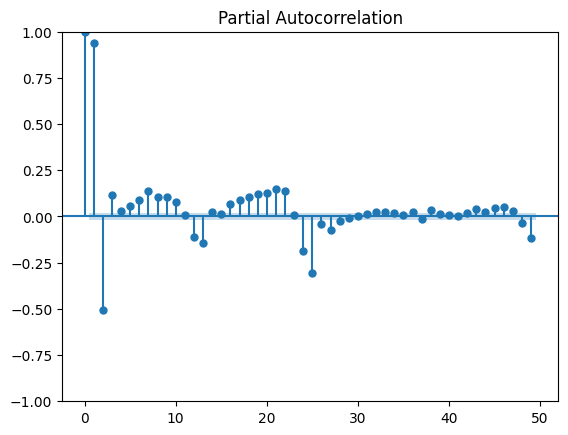

In [ ]:
import statsmodels.api as sm                    # Imports the statsmodels library (given the alias sm) for general statistical analysis tasks.
from statsmodels.graphics import tsaplots       # Imports functions for time series visualization from statsmodels

ele_price = pd.read_csv('/content/drive/MyDrive/Project Dataset/tdata.csv')            #  Load Data
print(ele_price)
ele_price.set_index('HourUTC', inplace=True)    # Sets the 'HourUTC' column as the index of the DataFrame ele_price
scaler = MinMaxScaler(feature_range=(0, 1))     # Creates a MinMaxScaler object named scaler that will scale data to the range of 0 to 1

# Verify if 'SpotPriceEUR' column exists in the DataFrame
if 'SpotPriceEUR' in ele_price.columns:
    df = pd.DataFrame({"SpotPriceEUR": scaler.fit_transform(np.array(ele_price['SpotPriceEUR']).reshape(len(ele_price), 1)).reshape(len(ele_price),)},
                      index=ele_price.index)
    # Continue with the plotting and analysis if 'SpotPriceEUR' column exists
    plt.figure(figsize=(12, 8))
    plt.plot(df)
    plt.xlabel('Time')
    plt.ylabel('Hourly Spot Price (EUR)')  # Updated label
    plt.title('Hourly Electricity Price')  # Updated title
    plt.savefig('fig1.png', dpi=800) # Removed the quality parameter as it is not supported by the Agg backend
    tsaplots.plot_acf(df, ax=None, lags=np.arange(50), use_vlines=True)     # Plots the Autocorrelation Function (ACF) of the data
    tsaplots.plot_pacf(df, ax=None, lags=np.arange(50), use_vlines=True)    # Plots the Partial Autocorrelation Function (PACF) of the data
    # Use sm directly for statistical functions
    print("ADF test results:", sm.tsa.stattools.adfuller(df.iloc[:, 0], autolag='AIC'))
    print(
        'High p-value of ADF test ({}) shows that we fail to reject null hypothesis. \n Hence, the dataset is non-stationary.'.format(
            sm.tsa.stattools.adfuller(df.iloc[:, 0], autolag='AIC')[1]))

else:
    print("Error: 'SpotPriceEUR' column not found in the DataFrame. Check the column names.")
    # Handle the case where 'SpotPriceEUR' column is missing
    print("Available columns:", ele_price.columns)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#this function generates the input output
def input_output_generator(z,n):
    #generating input output sets for mlp models
    x_train = []
    y_train = []
    x_test = []
    y_test = z[math.floor(trainfrac*len(z)):]
    z_train = z[:math.floor(trainfrac*len(z))]
    for i in range(len(z_train)-n):
        x_train.append(z[i:i+n])
        y_train.append(z[i+n])
    for i in range(len(y_test)):
        x_test.append(z[len(z_train)-n+i:len(z_train)+i])
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [ ]:
def Model_Build(Type,nodes,X_train, optimizer, learning_rate):
    # this function creates the model. Type is the type of deep learning model. It could be MLP, LSTM, ...
    # Nodes defines the sequence of nodes in different layers of network. It should be a list.
    # Optimizer and learning rate are used for compiling the model
    model = Sequential()
    if Type == 'MLP':
        model.add(Dense(nodes[0], activation='relu', input_shape=(X_train.shape[1],),
                        kernel_initializer='random_uniform', bias_initializer='RandomNormal'))
        for i in range(len(nodes)-1):
            model.add(Dense(nodes[i+1], activation='relu', kernel_initializer='random_uniform',
                            bias_initializer='RandomNormal'))

    if Type == 'Vanilla LSTM':
        model.add(LSTM(nodes, activation='relu', kernel_initializer='RandomNormal',
                       input_shape=(X_train[1,:].shape)))
        model.add(Dense(1))

    if Type == 'Stacked Unidirectional LSTM':
        model.add(LSTM(nodes[0], activation='relu', kernel_initializer='random_uniform',
                       bias_initializer='RandomNormal', return_sequences=True, input_shape=(X_train[1,:].shape)))
        for i in range(len(nodes)-1):
            retseq = True
            if (i+1) == (len(nodes)-1):
                retseq = False
            model.add(LSTM(nodes[i+1], activation='relu', kernel_initializer='random_uniform',
                           bias_initializer='RandomNormal',return_sequences=retseq))
        model.add(Dense(1, activation='relu', kernel_initializer='random_uniform',
                        bias_initializer='RandomNormal'))

    if Type == 'Bidirectional LSTM':
        model.add(Bidirectional(LSTM(nodes, activation='relu',
                                     kernel_initializer='random_uniform', bias_initializer='RandomNormal'),
                                merge_mode='ave', input_shape=(X_train[1,:].shape)))
        model.add(Dense(1))

    if Type == 'Stacked Bidirectional LSTM':
        model.add(Bidirectional(LSTM(nodes[0], activation='relu', return_sequences=True,
                                    kernel_initializer='random_uniform', bias_initializer='RandomNormal'),
                                merge_mode='ave', input_shape=(X_train[1,:].shape)))
        for i in range(len(nodes)-1):
            retseq = True
            if (i+1) == (len(nodes)-1):
                retseq = False
            model.add(Bidirectional(LSTM(nodes[i+1], activation='relu', return_sequences=retseq,
                                        kernel_initializer='random_uniform', bias_initializer='RandomNormal'),
                                   merge_mode='ave'))
        model.add(Dense(1, activation='relu', kernel_initializer='random_uniform',
                       bias_initializer='RandomNormal'))

    if Type == 'SimpleRNN':
        if type(nodes) == int:
            model.add(SimpleRNN(nodes, input_shape = (X_train.shape[1], X_train.shape[2]), activation = 'tanh',
                               kernel_initializer='random_uniform', bias_initializer='RandomNormal'))
        else:
            model.add(SimpleRNN(nodes[0], input_shape = (X_train.shape[1], X_train.shape[2]), activation = 'tanh',
                                return_sequences=True, kernel_initializer='random_uniform',
                                bias_initializer='RandomNormal'))
            for i in range(len(nodes)-1):
                retseq = True
                if (i+1) == (len(nodes)-1):
                    retseq = False
                model.add(SimpleRNN(nodes[i+1], activation='tanh', return_sequences=retseq,
                                    kernel_initializer='random_uniform',bias_initializer='RandomNormal'))
        model.add(Dense(1, activation='relu', kernel_initializer='random_uniform', bias_initializer='RandomNormal'))

    if Type == 'GRU':
        if type(nodes) == int:
            model.add(GRU(nodes, input_shape = (X_train.shape[1], X_train.shape[2]),
                          activation = 'tanh', return_sequences=False,
                         kernel_initializer='random_uniform', bias_initializer='RandomNormal'))
        else:
            model.add(GRU(nodes[0], input_shape = (X_train.shape[1], X_train.shape[2]),
                          activation = 'tanh', return_sequences=True,
                         kernel_initializer='random_uniform', bias_initializer='RandomNormal'))
            for i in range(len(nodes)-1):
                retseq = True
                model.add(GRU(nodes[i+1], activation='tanh', return_sequences=retseq,
                             kernel_initializer='random_uniform', bias_initializer='RandomNormal'))
        #model.add(GRU(1, activation='tanh', return_sequences=False,
         #            kernel_initializer='random_uniform', bias_initializer='RandomNormal'))
        model.add(Dense(1, activation='relu', kernel_initializer='random_uniform', bias_initializer='RandomNormal'))


    if optimizer == 'SGD':
        sgd = optimizers.SGD(lr=learning_rate, momentum=0)
        model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy', 'mse'])
    if optimizer == 'RMSprop':
        rmsprop = optimizers.RMSprop(lr=learning_rate, rho=0.9)
        model.compile(loss='mean_squared_error', optimizer=rmsprop, metrics=['accuracy', 'mse'])
    if optimizer == 'Adagrad':
        adagrad = optimizers.Adagrad(learning_rate=learning_rate)
        model.compile(loss='mean_squared_error', optimizer=adagrad, metrics=['accuracy', 'mse'])
    if optimizer == 'Adadelta':
        adadelta = optimizers.Adadelta(lr=learning_rate, rho=0.95)
        model.compile(loss='mean_squared_error', optimizer=adadelta, metrics=['accuracy', 'mse'])
    if optimizer == 'Adam':
        adam = optimizers.Adam(learning_rate)
        model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy', 'mse'])
    return model


def Tune_epoch(Type, X_train, Y_train, nodes, val_split, epochs, batch_size, optimizer, learning_rate):
    #this funciton tunes number of epochs of the model.
    e = [0 for i in range(len(epochs))]
    ii = 0
    for i in epochs:
        model = Model_Build(Type,nodes,X_train, optimizer, learning_rate)
        history_lstm = model.fit(X_train, Y_train, validation_split=val_split, epochs=i, batch_size=batch_size, verbose=0, shuffle=False)
        e[ii] = history_lstm.history['val_loss'][-1]
        ii += 1
    return e

def Tune_nodes(Type, X_train, Y_train, nodes, val_split, epochs, batch_size, optimizer, learning_rate):
    #this function tunes number of nodes.
    e = {}
    if np.size(np.shape(nodes)) == 1:
        for i in nodes:
            model = Model_Build(Type, i, X_train, optimizer, learning_rate)
            history = model.fit(X_train, Y_train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)
            e[i] = history.history['val_loss'][-1]
    else:
        for i in range(np.shape(nodes)[0]):
            model = Model_Build(Type, nodes[i], X_train, optimizer, learning_rate)
            history = model.fit(X_train, Y_train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)
            e[i] = history.history['val_loss'][-1]
    return e

def Tune_optimizer(Type, X_train, Y_train, nodes, val_split, epochs, batch_size, optimizer, learning_rate):
    #this function tunes the optimizer and the learning rate.
    e = {}
    for i in range(len(optimizer)):
        for j in range(len(learning_rate)):
            model = Model_Build(Type, nodes, X_train, optimizer[i], learning_rate[j])
            history = model.fit(X_train, Y_train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)
            e[optimizer[i]+', rate='+str(learning_rate[j])] = history.history['val_loss'][-1]
    return e

def Tune_batch(Type, X_train, Y_train, nodes, val_split, epochs, batch_size, optimizer, learning_rate):
    #this function tunes the batch size.
    e = {}
    for i in batch_size:
        model = Model_Build(Type, nodes, X_train, optimizer, learning_rate)
        history = model.fit(X_train, Y_train, validation_split=val_split, epochs=epochs, batch_size=i, verbose=0, shuffle=False)
        e[i] = history.history['val_loss'][-1]
    return e

In [ ]:
#this function generates the input output
def input_output_generator(z,n, trainfrac=0.8): # Added default value for trainfrac
    #generating input output sets for mlp models
    x_train = []
    y_train = []
    x_test = []
    y_test = z[math.floor(trainfrac*len(z)):] # Now uses the defined trainfrac
    z_train = z[:math.floor(trainfrac*len(z))]
    for i in range(len(z_train)-n):
        x_train.append(z[i:i+n])
        y_train.append(z[i+n])
    for i in range(len(y_test)):
        x_test.append(z[len(z_train)-n+i:len(z_train)+i])
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [ ]:
lag_mlp = 5 # lag is number of previous steps
X_train_mlp, Y_train_mlp, X_test_mlp, Y_test_mlp = input_output_generator(df['SpotPriceEUR'].tolist(), lag_mlp)

In [ ]:
#tuning optimizer. This can give us a good starting point.
opt = ['Adam', 'Adagrad']
lr = [0.001, 0.01]
nodes = [64,32,8,1]
e = Tune_optimizer('MLP', X_train_mlp, Y_train_mlp, nodes, validation_split, 50, 10, opt, lr)
optimizer = (min(e, key=e.get)).split(', ')[0]
learning_rate = float(((min(e, key=e.get)).split(', ')[1]).split('=')[1])
e

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

{'Adam, rate=0.001': 0.3427010178565979,
 'Adam, rate=0.01': 0.3427010178565979,
 'Adagrad, rate=0.001': 0.0017301193438470364,
 'Adagrad, rate=0.01': 0.3427010178565979}

In [ ]:
# tuning number of layers and nodes in MLP
#we will give few candidates for comparing
nodes = [[200,100,50,1],[64,32,16,1],[128,64,16,1]]
e = Tune_nodes('MLP', X_train_mlp, Y_train_mlp, nodes, validation_split, 50, 10, optimizer, learning_rate)
e

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{0: 0.3427010178565979, 1: 0.3427010178565979, 2: 0.0017952730413526297}

In [ ]:
nodes_mlp = [200, 100, 50, 1]

In [ ]:
#tune batch size
batch = [5, 10, 30]
e = Tune_batch('MLP', X_train_mlp, Y_train_mlp, nodes_mlp, validation_split, 50, batch, optimizer, learning_rate)
batch_size = int(min(e, key=e.get))

In [ ]:
batch_size = 10
nodes_mlp = [100, 50, 20, 1]
optimizer = 'Adam'
learning_rate = 0.001

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 3.8335e-05 - loss: 0.0716 - mse: 0.0716 - val_accuracy: 5.6022e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/200
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 3.8335e-05 - loss: 0.0012 - mse: 0.0012 - val_accuracy: 5.6022e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/200
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 3.8335e-05 - loss: 0.0012 - mse: 0.0012 - val_accuracy: 5.6022e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 4/200
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 3.8335e-05 - loss: 0.0012 - mse: 0.0012 - val_accuracy: 5.6022e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/200
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 3.8335e-05 - loss: 0.0011 - mse: 0.0011 - val_accuracy: 5.6022e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/200
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 3.8335e-05 - loss: 0.0010 - mse: 0.0010 - val_accuracy: 5.6022e-04 - val_loss: 0.0012 - val_mse: 0.00

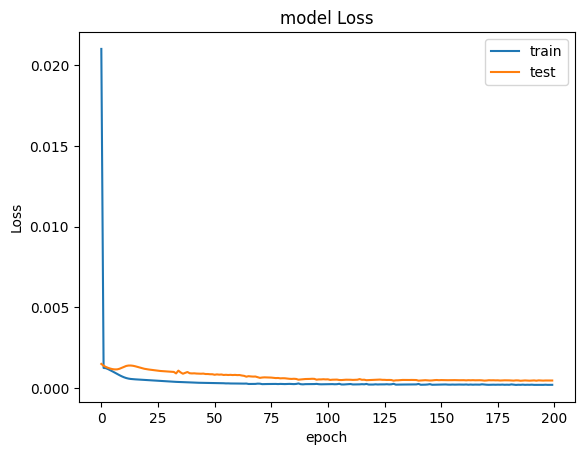

In [ ]:
model_mlp = Model_Build('MLP', nodes_mlp, X_train_mlp, optimizer, learning_rate)
history_mlp = model_mlp.fit(X_train_mlp, Y_train_mlp, validation_split=validation_split, epochs=200,
                            batch_size=batch_size, verbose=1, shuffle=False)
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 3.8335e-05 - loss: 0.0769 - mse: 0.0769 - val_accuracy: 5.6022e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 3.8335e-05 - loss: 0.0012 - mse: 0.0012 - val_accuracy: 5.6022e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 3.8335e-05 - loss: 0.0012 - mse: 0.0012 - val_accuracy: 5.6022e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 3.8335e-05 - loss: 0.0011 - mse: 0.0011 - val_accuracy: 5.6022e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 3.8335e-05 - loss: 0.0011 - mse: 0.0011 - val_accuracy: 5.6022e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 3.8335e-05 - loss: 9.8749e-04 - mse: 9.8749e-04 - val_accuracy: 5.6022e-04 - val_loss: 0.0014 - val_

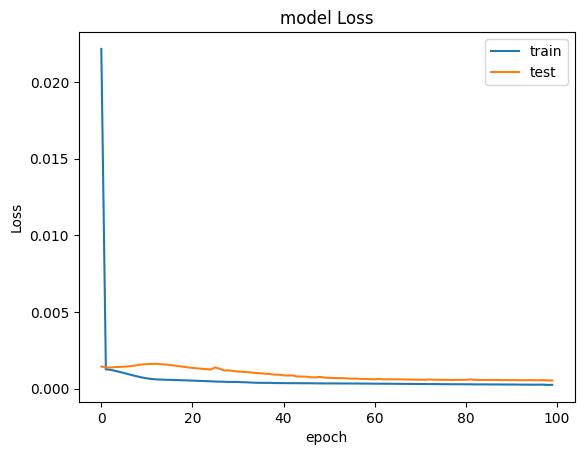

In [ ]:
# 50 epochs are enough for training the model.
model_mlp = Model_Build('MLP', nodes_mlp, X_train_mlp, optimizer, learning_rate)
history_mlp = model_mlp.fit(X_train_mlp, Y_train_mlp, epochs=100,validation_split=validation_split,
                            batch_size=batch_size, verbose=1, shuffle=False)
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
trainprediction_mlp = model_mlp.predict(X_train_mlp)
testprediction_mlp = model_mlp.predict(X_test_mlp)
trainprediction_mlp = pd.DataFrame(index=df.index[lag_mlp:len(df)-len(X_test_mlp)], data=trainprediction_mlp)
testprediction_mlp = pd.DataFrame(index=df.index[len(df)-len(X_test_mlp):], data=testprediction_mlp)

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


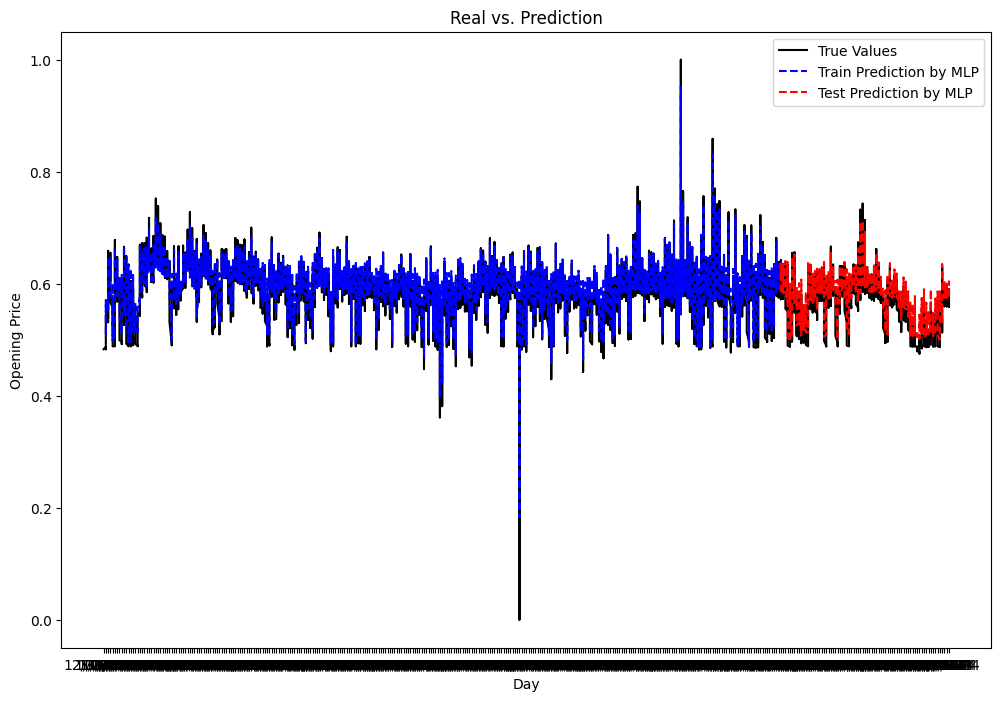

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df.SpotPriceEUR, 'k')
plt.plot(trainprediction_mlp, '--b')
plt.plot(testprediction_mlp, '--r')
plt.title('Real vs. Prediction')
plt.ylabel('Opening Price')
plt.xlabel('Day')
plt.legend(['True Values', 'Train Prediction by MLP', 'Test Prediction by MLP'], loc='best')
plt.show()

In [ ]:
df

,SpotPriceEUR
HourUTC,
12/31/2022,0.483105
1/1/2023,0.487108
1/1/2023,0.486717
1/1/2023,0.483193
1/1/2023,0.483769
...,...
1/7/2024,0.589249
1/7/2024,0.586271
1/7/2024,0.579252


In [ ]:
Metrics = {}  # Initialize an empty dictionary to store your metrics
Metrics['RMSE_CNN-LSTM'] = RMSE(Y_test_clstm, testprediction_clstm)
Metrics['MAPE_CNN-LSTM'] = MAPE(Y_test_clstm, testprediction_clstm)
Metrics['MSLE_CNN-LSTM'] = MSLE(Y_test_clstm, testprediction_clstm)
Metrics

NameError: name 'Y_test_clstm' is not defined

In [ ]:
Metrics = {}  # Initialize an empty dictionary to store your metrics

# Replace '...' with the actual variables you used for the MLP model
Metrics['RMSE_MLP'] = RMSE(Y_test_mlp, testprediction_mlp)
Metrics['MAPE_MLP'] = MAPE(Y_test_mlp, testprediction_mlp)
Metrics['MSLE_MLP'] = MSLE(Y_test_mlp, testprediction_mlp)
Metrics

{'RMSE_MLP': 0.019133115647213834,
 'MAPE_MLP': 8.447263290577125,
 'MSLE_MLP': 0.0001522565453702404}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df_last_24 = df.tail(100)
testprediction_clstm_last_24 = testprediction_clstm.tail(100)
plt.plot(range(100), df_last_24.values)
plt.plot(range(100), testprediction_clstm_last_24.values)  # Use range(24) for x-axis
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of Last 24 Values')
plt.show()

NameError: name 'testprediction_clstm' is not defined

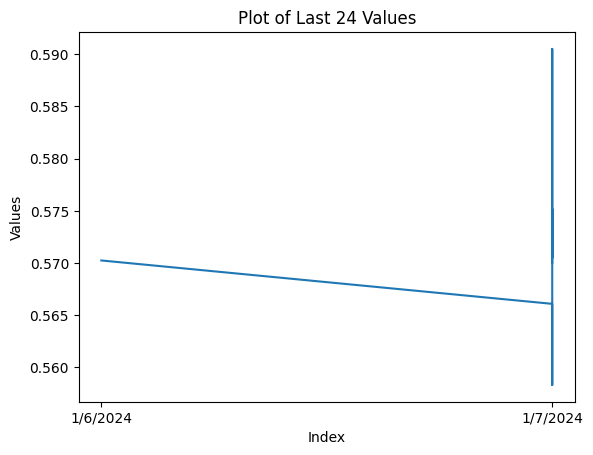

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df_last_24 = df.tail(24)
plt.plot(df_last_24.index, df_last_24.values)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of Last 24 Values')
plt.show()

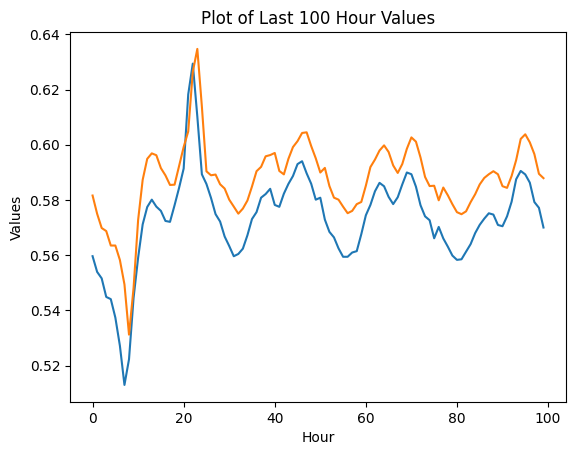

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df_last_24 = df.tail(100)
testprediction_mlp_last_24 = testprediction_mlp.tail(100)
plt.plot(range(100), df_last_24.values)
plt.plot(range(100), testprediction_mlp_last_24.values)  # Use range(24) for x-axis
plt.xlabel('Hour')
plt.ylabel('Values')
plt.title('Plot of Last 100 Hour Values')
plt.show()

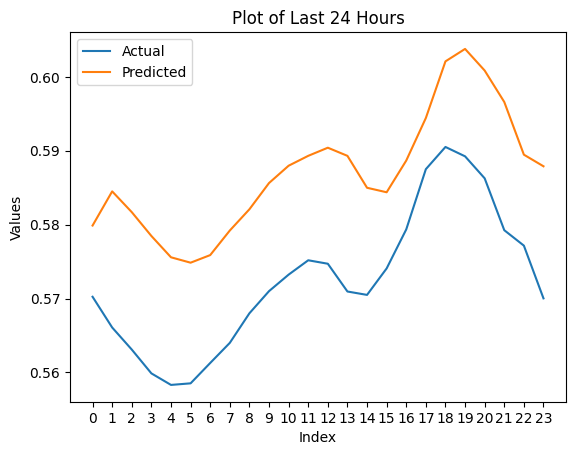

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' and 'testprediction_clstm' are your DataFrames
df_last_24 = df.tail(24)
testprediction_mlp_last_24 = testprediction_mlp.tail(24)

plt.plot(range(24), df_last_24.values, label='Actual')
plt.plot(range(24), testprediction_mlp_last_24.values, label='Predicted')
plt.xticks(range(24))  # Set x-ticks to represent each point
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of Last 24 Hours')
plt.legend()
plt.show()

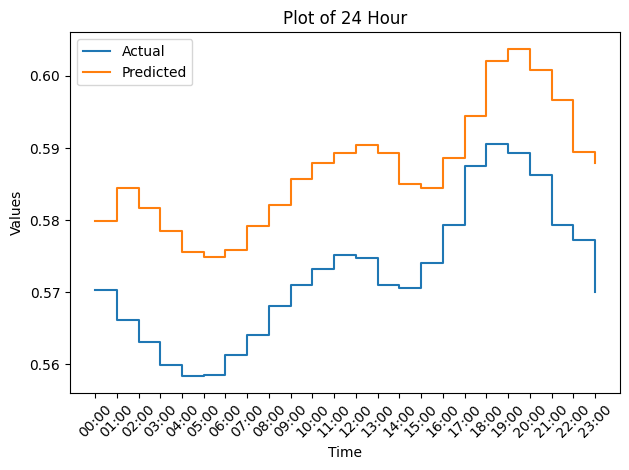

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Assuming 'df' and 'testprediction_clstm' are your DataFrames
df_last_24 = df.tail(24)
testprediction_mlp_last_24 = testprediction_mlp.tail(24)

actual_prices = df_last_24.values.flatten().tolist()
predicted_prices = testprediction_mlp_last_24.values.flatten().tolist()

hours = list(range(24))
labels = [f'{h:02d}:00' for h in hours]

plt.step(hours, actual_prices, label='Actual', where='post')
plt.step(hours, predicted_prices, label='Predicted', where='post')
plt.xticks(hours, labels, rotation=45)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Plot of 24 Hour')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

testprediction_mlp1 = scaler.inverse_transform(testprediction_mlp)

In [ ]:
import pandas as pd # Import pandas

# Convert the NumPy array to a Pandas DataFrame
df_testprediction_mlp1 = pd.DataFrame(testprediction_mlp1)

# Now you can use .tail()
df_testprediction_mlp1.tail(24)

,0
1762,93.956268
1763,98.692131
1764,95.811188
1765,92.509293
1766,89.553978
1767,88.804947
1768,89.858383
1769,93.264191
1770,96.210701
1771,99.847221


In [ ]:
ele_price.SpotPriceEUR.tail(24)


,SpotPriceEUR
HourUTC,
1/6/2024,84.080002
1/7/2024,79.820000
1/7/2024,76.760002
1/7/2024,73.459999
1/7/2024,71.860001
1/7/2024,72.080002
1/7/2024,74.900002
1/7/2024,77.690002
1/7/2024,81.790001


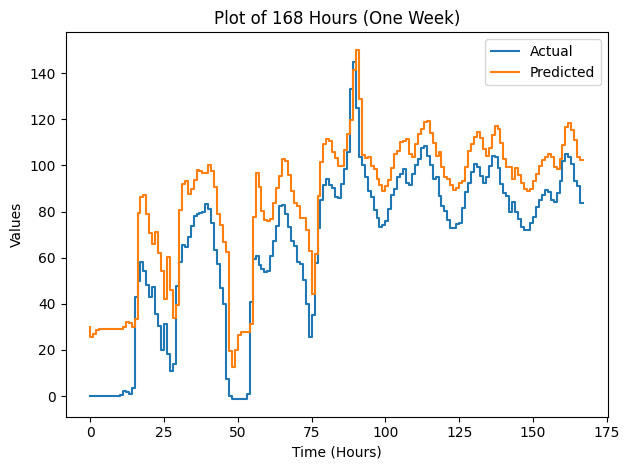

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Assuming 'df' and 'testprediction_clstm' are your DataFrames
df_last_168 = df.tail(168) # Get the last 168 hours of data
testprediction_mlp_last_168 = df_testprediction_mlp1.tail(168) # Get the last 168 hours of predictions

actual_prices = df_last_168.values.flatten().tolist()
predicted_prices = testprediction_mlp_last_168.values.flatten().tolist()

hours = list(range(168)) # Create a list for the hours
# labels = [f'Day {d}' for d in days] # No need for day labels if plotting hourly data

# Remove 'where' argument from plt.plot()
plt.step(hours, ele_price.SpotPriceEUR.tail(168), label='Actual')
plt.step(hours, predicted_prices, label='Predicted')
# plt.xticks(hours, labels, rotation=45) # No need for xticks if not using day labels
plt.xlabel('Time (Hours)') # Change x-axis label to reflect hourly data
plt.ylabel('Values')
plt.title('Plot of 168 Hours (One Week)') # Update title
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame from the list
df = pd.DataFrame({'Predicted Prices': predicted_prices})

# Save the DataFrame to an Excel file
df.to_excel('/content/drive/MyDrive/Project Dataset/mlp_predicted_prices.xlsx', index=False)